In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5170170


In [9]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5170170/sandbox’: File exists


In [7]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5170170/sandbox'

In [8]:
os.environ['LANLEP_HOME']=HOME

In [9]:
import data

In [20]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

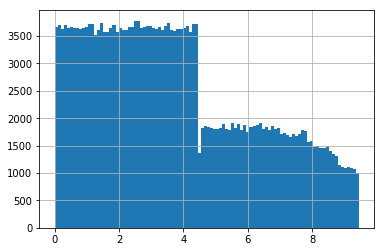

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

2.0751427662143223

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [16]:
data=traintest.traindf
data.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_13_o13686688  0.153793  0.252002  0.115362 -0.135008  0.084726   
quake_11_o10971263  0.186869  0.232279  0.116231 -0.128347  0.081842   
quake_13_o2300617   0.205687  0.200959  0.109438 -0.078377  0.043451   
quake_11_o1146388   0.185285  0.209010  0.129064 -0.108109  0.060230   
quake_03_o14959363  0.171327  0.221359  0.125176 -0.098631  0.061466   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_13_o13686688 -0.021867 -0.005263  0.239939  0.171421 -0.142894  ...   
quake_11_o10971263 -0.029581 -0.003840  0.226696  0.162483 -0.092634  ...   
quake_13_o2300617  -0.137988 -0.009339  0.158783  0.181458 -0.020147  ...   
quake_11_o1146388  -0.080226 -0.029042  0.178731  0.170022 -0.066760  ...   
quake_03_o14959363 -0.084572 -0.004272  0.181916  0.169383 -0.055399  ...   

                      fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                  
quake_13_o13686688  0.109007  0.180867  0.027012  0.044774  0.028781   
quake_11_o10971263  0.093780  0.181602  0.060105  0.039644 -0.010936   
quake_13_o2300617   0.050201  0.184665  0.091970  0.057466 -0.050179   
quake_11_o1146388   0.070571  0.198318  0.072047  0.046459 -0.020315   
quake_03_o14959363  0.072691  0.167620  0.064355  0.057553 -0.031640   

                      fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                 
quake_13_o13686688  0.006128  0.023644 -0.116737 -0.010711  0.164185  
quake_11_o10971263  0.023625  0.018926 -0.114227  0.001870  0.113800  
quake_13_o2300617   0.015093 -0.012664 -0.122463  0.020853  0.062428  
quake_11_o1146388   0.025861  0.020317 -0.107892  0.026311  0.074932  
quake_03_o14959363  0.023935  0.004552 -0.120380  0.007215  0.118175  

[5 rows x 100 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_13_o13686688    0.905300
quake_11_o10971263    1.610999
quake_13_o2300617     3.863199
quake_11_o1146388     4.163498
quake_03_o14959363    0.575696
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_13_o13686688     13
quake_11_o10971263     11
quake_13_o2300617      13
quake_11_o1146388      11
quake_03_o14959363      3

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

1      2      3      4      5     6      7      8      9      10  \
index  19245  19237  16770  19245  13679  9845  19242  13104  19245  19236   

          11     12     13     14     15  
index  19237  16652  15646  19244  19087

In [20]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{1: 19245,
 2: 19237,
 3: 16770,
 4: 19245,
 5: 13679,
 6: 9845,
 7: 19242,
 8: 13104,
 9: 19245,
 10: 19236,
 11: 19237,
 12: 16652,
 13: 15646,
 14: 19244,
 15: 19087}

In [21]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [22]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [23]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [24]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [26]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 2 train quake 1
(19245, 100) (19245,) (19237, 100) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.979515	valid_1's l1: 2.16969
[100]	training's l1: 0.713396	valid_1's l1: 2.17764
[150]	training's l1: 0.569132	valid_1's l1: 2.18953
[200]	training's l1: 0.485213	valid_1's l1: 2.20166
Early stopping, best iteration is:
[10]	training's l1: 1.72489	valid_1's l1: 2.15209
quake  1 2 (2.152085879729475, 10)
valid quake 3 train quake 1
(19245, 100) (19245,) (16770, 100) (16770,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.979515	valid_1's l1: 1.5883
[100]	training's l1: 0.713396	valid_1's l1: 1.56077
[150]	training's l1: 0.569132	valid_1's l1: 1.56915
[200]	training's l1: 0.485213	valid_1's l1: 1.57844
[250]	training's l1: 0.430706	valid_1's l1: 1.58512
[300]	training's l1: 0.390968	valid_1's l1: 1.58828
Early stopping, best iteration is:
[100]	training's l1: 0.713396	valid_

[50]	training's l1: 1.21533	valid_1's l1: 1.91668
[100]	training's l1: 0.918478	valid_1's l1: 1.88706
[150]	training's l1: 0.765605	valid_1's l1: 1.87661
[200]	training's l1: 0.669269	valid_1's l1: 1.88519
[250]	training's l1: 0.604133	valid_1's l1: 1.8925
[300]	training's l1: 0.554241	valid_1's l1: 1.89265
[350]	training's l1: 0.51452	valid_1's l1: 1.89785
Early stopping, best iteration is:
[160]	training's l1: 0.742365	valid_1's l1: 1.87368
quake  2 4 (1.8736768395999712, 160)
valid quake 5 train quake 2
(19237, 100) (19237,) (13679, 100) (13679,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.21533	valid_1's l1: 3.59188
[100]	training's l1: 0.918478	valid_1's l1: 4.11766
[150]	training's l1: 0.765605	valid_1's l1: 4.28943
[200]	training's l1: 0.669269	valid_1's l1: 4.36511
Early stopping, best iteration is:
[1]	training's l1: 2.12287	valid_1's l1: 1.92847
quake  2 5 (1.9284669635469105, 1)
valid quake 6 train quake 2
(19237, 100) (19237,) (9845,

[250]	training's l1: 0.240256	valid_1's l1: 1.96294
Early stopping, best iteration is:
[63]	training's l1: 0.672577	valid_1's l1: 1.91886
quake  3 4 (1.9188629494646663, 63)
valid quake 5 train quake 3
(16770, 100) (16770,) (13679, 100) (13679,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.763431	valid_1's l1: 1.19118
[100]	training's l1: 0.499782	valid_1's l1: 1.16084
[150]	training's l1: 0.360414	valid_1's l1: 1.16017
[200]	training's l1: 0.28289	valid_1's l1: 1.17609
[250]	training's l1: 0.240256	valid_1's l1: 1.19125
Early stopping, best iteration is:
[95]	training's l1: 0.518766	valid_1's l1: 1.15708
quake  3 5 (1.157079757503728, 95)
valid quake 6 train quake 3
(16770, 100) (16770,) (9845, 100) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.763431	valid_1's l1: 1.20511
[100]	training's l1: 0.499782	valid_1's l1: 1.1712
[150]	training's l1: 0.360414	valid_1's l1: 1.15838
[200]	training's l1: 0.28

[150]	training's l1: 0.556009	valid_1's l1: 2.37246
[200]	training's l1: 0.474587	valid_1's l1: 2.41716
Early stopping, best iteration is:
[13]	training's l1: 1.61304	valid_1's l1: 1.88511
quake  4 3 (1.8851082514389563, 13)
quake  4 4 (nan, nan)
valid quake 5 train quake 4
(19245, 100) (19245,) (13679, 100) (13679,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.983615	valid_1's l1: 2.50157
[100]	training's l1: 0.695779	valid_1's l1: 2.61878
[150]	training's l1: 0.556009	valid_1's l1: 2.69213
[200]	training's l1: 0.474587	valid_1's l1: 2.73941
Early stopping, best iteration is:
[4]	training's l1: 1.97687	valid_1's l1: 1.90249
quake  4 5 (1.9024876784382614, 4)
valid quake 6 train quake 4
(19245, 100) (19245,) (9845, 100) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.983615	valid_1's l1: 2.39668
[100]	training's l1: 0.695779	valid_1's l1: 2.51764
[150]	training's l1: 0.556009	valid_1's l1: 2.58705
[200

[150]	training's l1: 0.363431	valid_1's l1: 0.935389
[200]	training's l1: 0.288512	valid_1's l1: 0.933778
[250]	training's l1: 0.246438	valid_1's l1: 0.931143
[300]	training's l1: 0.221395	valid_1's l1: 0.932463
[350]	training's l1: 0.204444	valid_1's l1: 0.931308
[400]	training's l1: 0.191647	valid_1's l1: 0.932913
[450]	training's l1: 0.180794	valid_1's l1: 0.933141
[500]	training's l1: 0.17211	valid_1's l1: 0.934656
[550]	training's l1: 0.164706	valid_1's l1: 0.936984
Early stopping, best iteration is:
[367]	training's l1: 0.199718	valid_1's l1: 0.930948
quake  5 6 (0.9309475786120509, 367)
valid quake 7 train quake 5
(13679, 100) (13679,) (19242, 100) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.756133	valid_1's l1: 2.21809
[100]	training's l1: 0.500129	valid_1's l1: 2.3278
[150]	training's l1: 0.363431	valid_1's l1: 2.40131
[200]	training's l1: 0.288512	valid_1's l1: 2.44599
Early stopping, best iteration is:
[8]	training's l1: 1.50

[150]	training's l1: 0.333353	valid_1's l1: 1.1318
[200]	training's l1: 0.258975	valid_1's l1: 1.10024
[250]	training's l1: 0.218099	valid_1's l1: 1.08836
[300]	training's l1: 0.192268	valid_1's l1: 1.07811
[350]	training's l1: 0.176246	valid_1's l1: 1.07289
[400]	training's l1: 0.164678	valid_1's l1: 1.06985
[450]	training's l1: 0.154705	valid_1's l1: 1.06941
[500]	training's l1: 0.146439	valid_1's l1: 1.06945
[550]	training's l1: 0.139738	valid_1's l1: 1.06976
[600]	training's l1: 0.133653	valid_1's l1: 1.06941
[650]	training's l1: 0.128312	valid_1's l1: 1.06981
[700]	training's l1: 0.12346	valid_1's l1: 1.06915
[750]	training's l1: 0.119293	valid_1's l1: 1.06812
[800]	training's l1: 0.115038	valid_1's l1: 1.06765
[850]	training's l1: 0.111493	valid_1's l1: 1.06655
[900]	training's l1: 0.108198	valid_1's l1: 1.06622
[950]	training's l1: 0.105156	valid_1's l1: 1.06563
[1000]	training's l1: 0.102302	valid_1's l1: 1.06516
[1050]	training's l1: 0.0995363	valid_1's l1: 1.0648
[1100]	train

[450]	training's l1: 0.154705	valid_1's l1: 1.17105
[500]	training's l1: 0.146439	valid_1's l1: 1.17094
[550]	training's l1: 0.139738	valid_1's l1: 1.17054
[600]	training's l1: 0.133653	valid_1's l1: 1.16876
[650]	training's l1: 0.128312	valid_1's l1: 1.16947
[700]	training's l1: 0.12346	valid_1's l1: 1.16946
[750]	training's l1: 0.119293	valid_1's l1: 1.16899
[800]	training's l1: 0.115038	valid_1's l1: 1.16824
[850]	training's l1: 0.111493	valid_1's l1: 1.16792
[900]	training's l1: 0.108198	valid_1's l1: 1.16796
[950]	training's l1: 0.105156	valid_1's l1: 1.16795
[1000]	training's l1: 0.102302	valid_1's l1: 1.16882
[1050]	training's l1: 0.0995363	valid_1's l1: 1.16866
[1100]	training's l1: 0.0970214	valid_1's l1: 1.16831
Early stopping, best iteration is:
[918]	training's l1: 0.107142	valid_1's l1: 1.16767
quake  6 13 (1.1676658041803274, 918)
valid quake 14 train quake 6
(9845, 100) (9845,) (19244, 100) (19244,)
Training until validation scores don't improve for 200 rounds.
[50]	trai

[50]	training's l1: 1.19912	valid_1's l1: 2.72316
[100]	training's l1: 0.9102	valid_1's l1: 3.0045
[150]	training's l1: 0.750897	valid_1's l1: 3.15504
[200]	training's l1: 0.651161	valid_1's l1: 3.25714
Early stopping, best iteration is:
[3]	training's l1: 2.06549	valid_1's l1: 2.13256
quake  7 15 (2.1325605283821236, 3)
valid quake 1 train quake 8
(13104, 100) (13104,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745714	valid_1's l1: 1.90684
[100]	training's l1: 0.49026	valid_1's l1: 1.9248
[150]	training's l1: 0.349891	valid_1's l1: 1.94313
[200]	training's l1: 0.270611	valid_1's l1: 1.95811
Early stopping, best iteration is:
[45]	training's l1: 0.785222	valid_1's l1: 1.90657
quake  8 1 (1.9065721004540916, 45)
valid quake 2 train quake 8
(13104, 100) (13104,) (19237, 100) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745714	valid_1's l1: 2.1074
[100]	training's l1: 0.49026	v

[450]	training's l1: 0.164102	valid_1's l1: 1.62842
[500]	training's l1: 0.156089	valid_1's l1: 1.62427
[550]	training's l1: 0.149672	valid_1's l1: 1.62318
[600]	training's l1: 0.144202	valid_1's l1: 1.62101
[650]	training's l1: 0.139346	valid_1's l1: 1.61938
[700]	training's l1: 0.134773	valid_1's l1: 1.61926
[750]	training's l1: 0.130756	valid_1's l1: 1.618
[800]	training's l1: 0.126994	valid_1's l1: 1.61817
[850]	training's l1: 0.123599	valid_1's l1: 1.61704
[900]	training's l1: 0.120539	valid_1's l1: 1.61583
[950]	training's l1: 0.117575	valid_1's l1: 1.61497
[1000]	training's l1: 0.114782	valid_1's l1: 1.6131
[1050]	training's l1: 0.112252	valid_1's l1: 1.61339
[1100]	training's l1: 0.109848	valid_1's l1: 1.61208
[1150]	training's l1: 0.107399	valid_1's l1: 1.61151
[1200]	training's l1: 0.105208	valid_1's l1: 1.61139
[1250]	training's l1: 0.103017	valid_1's l1: 1.61175
[1300]	training's l1: 0.101073	valid_1's l1: 1.61174
[1350]	training's l1: 0.0992014	valid_1's l1: 1.6107
[1400]	

quake  9 11 (1.3848113666069712, 360)
valid quake 12 train quake 9
(19245, 100) (19245,) (16652, 100) (16652,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.857192	valid_1's l1: 1.14965
[100]	training's l1: 0.571301	valid_1's l1: 1.15378
[150]	training's l1: 0.425558	valid_1's l1: 1.17133
[200]	training's l1: 0.348677	valid_1's l1: 1.18602
[250]	training's l1: 0.3063	valid_1's l1: 1.19726
Early stopping, best iteration is:
[63]	training's l1: 0.759203	valid_1's l1: 1.1459
quake  9 12 (1.1459048444100894, 63)
valid quake 13 train quake 9
(19245, 100) (19245,) (15646, 100) (15646,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.857192	valid_1's l1: 1.13515
[100]	training's l1: 0.571301	valid_1's l1: 1.13706
[150]	training's l1: 0.425558	valid_1's l1: 1.16158
[200]	training's l1: 0.348677	valid_1's l1: 1.17727
[250]	training's l1: 0.3063	valid_1's l1: 1.18752
Early stopping, best iteration is:
[71]	training's l1:

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.967517	valid_1's l1: 1.53409
[100]	training's l1: 0.688702	valid_1's l1: 1.53407
[150]	training's l1: 0.547841	valid_1's l1: 1.55724
[200]	training's l1: 0.465305	valid_1's l1: 1.57994
[250]	training's l1: 0.412612	valid_1's l1: 1.60023
Early stopping, best iteration is:
[80]	training's l1: 0.77486	valid_1's l1: 1.52944
quake  10 9 (1.5294407665420124, 80)
quake  10 10 (nan, nan)
valid quake 11 train quake 10
(19236, 100) (19236,) (19237, 100) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.967517	valid_1's l1: 1.29562
[100]	training's l1: 0.688702	valid_1's l1: 1.18123
[150]	training's l1: 0.547841	valid_1's l1: 1.14507
[200]	training's l1: 0.465305	valid_1's l1: 1.13734
[250]	training's l1: 0.412612	valid_1's l1: 1.13774
[300]	training's l1: 0.375564	valid_1's l1: 1.13769
[350]	training's l1: 0.346767	valid_1's l1: 1.14046
Early stopping, best iteration i

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.919472	valid_1's l1: 2.30561
[100]	training's l1: 0.642666	valid_1's l1: 2.51878
[150]	training's l1: 0.498992	valid_1's l1: 2.62747
[200]	training's l1: 0.418277	valid_1's l1: 2.69453
Early stopping, best iteration is:
[7]	training's l1: 1.79855	valid_1's l1: 1.78321
quake  11 8 (1.7832135637004638, 7)
valid quake 9 train quake 11
(19237, 100) (19237,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.919472	valid_1's l1: 1.42474
[100]	training's l1: 0.642666	valid_1's l1: 1.43629
[150]	training's l1: 0.498992	valid_1's l1: 1.46194
[200]	training's l1: 0.418277	valid_1's l1: 1.48504
[250]	training's l1: 0.368483	valid_1's l1: 1.50135
Early stopping, best iteration is:
[51]	training's l1: 0.911285	valid_1's l1: 1.42445
quake  11 9 (1.4244465927073084, 51)
valid quake 10 train quake 11
(19237, 100) (19237,) (19236, 100) (19236,)
Training until val

[50]	training's l1: 0.794446	valid_1's l1: 1.40214
[100]	training's l1: 0.527004	valid_1's l1: 1.32946
[150]	training's l1: 0.38874	valid_1's l1: 1.2988
[200]	training's l1: 0.311121	valid_1's l1: 1.28406
[250]	training's l1: 0.265008	valid_1's l1: 1.27751
[300]	training's l1: 0.236523	valid_1's l1: 1.27318
[350]	training's l1: 0.217868	valid_1's l1: 1.27075
[400]	training's l1: 0.203836	valid_1's l1: 1.27045
[450]	training's l1: 0.192298	valid_1's l1: 1.26937
[500]	training's l1: 0.183456	valid_1's l1: 1.26971
[550]	training's l1: 0.175923	valid_1's l1: 1.26964
[600]	training's l1: 0.169218	valid_1's l1: 1.26922
[650]	training's l1: 0.163508	valid_1's l1: 1.26826
[700]	training's l1: 0.158415	valid_1's l1: 1.26781
[750]	training's l1: 0.153955	valid_1's l1: 1.26712
[800]	training's l1: 0.149556	valid_1's l1: 1.26654
[850]	training's l1: 0.145659	valid_1's l1: 1.2661
[900]	training's l1: 0.142276	valid_1's l1: 1.26536
[950]	training's l1: 0.13903	valid_1's l1: 1.26533
[1000]	training's

[200]	training's l1: 0.344396	valid_1's l1: 1.0806
[250]	training's l1: 0.298089	valid_1's l1: 1.07789
[300]	training's l1: 0.268604	valid_1's l1: 1.08095
[350]	training's l1: 0.246521	valid_1's l1: 1.08283
[400]	training's l1: 0.229136	valid_1's l1: 1.08476
[450]	training's l1: 0.214611	valid_1's l1: 1.08593
Early stopping, best iteration is:
[260]	training's l1: 0.291285	valid_1's l1: 1.07712
quake  13 3 (1.0771226260855564, 260)
valid quake 4 train quake 13
(15646, 100) (15646,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.835315	valid_1's l1: 1.90213
[100]	training's l1: 0.561262	valid_1's l1: 1.89685
[150]	training's l1: 0.422834	valid_1's l1: 1.91034
[200]	training's l1: 0.344396	valid_1's l1: 1.92251
[250]	training's l1: 0.298089	valid_1's l1: 1.92821
Early stopping, best iteration is:
[78]	training's l1: 0.656415	valid_1's l1: 1.89414
quake  13 4 (1.8941412042839356, 78)
valid quake 5 train quake 13
(15646, 100) (156

[1150]	training's l1: 0.135222	valid_1's l1: 1.3893
[1200]	training's l1: 0.132483	valid_1's l1: 1.38511
[1250]	training's l1: 0.129956	valid_1's l1: 1.38114
[1300]	training's l1: 0.127546	valid_1's l1: 1.37857
[1350]	training's l1: 0.125207	valid_1's l1: 1.37587
[1400]	training's l1: 0.122905	valid_1's l1: 1.37349
[1450]	training's l1: 0.120659	valid_1's l1: 1.37171
[1500]	training's l1: 0.118536	valid_1's l1: 1.36976
quake  13 15 (1.3697609408330738, 0)
valid quake 1 train quake 14
(19244, 100) (19244,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.28746	valid_1's l1: 1.99731
[100]	training's l1: 0.963586	valid_1's l1: 1.96023
[150]	training's l1: 0.795792	valid_1's l1: 1.91233
[200]	training's l1: 0.688148	valid_1's l1: 1.90103
[250]	training's l1: 0.613748	valid_1's l1: 1.89808
[300]	training's l1: 0.558942	valid_1's l1: 1.88508
[350]	training's l1: 0.515351	valid_1's l1: 1.87834
[400]	training's l1: 0.479244	valid_1's l1

[200]	training's l1: 0.292334	valid_1's l1: 2.62011
Early stopping, best iteration is:
[6]	training's l1: 1.79193	valid_1's l1: 2.12748
quake  15 2 (2.127480844463928, 6)
valid quake 3 train quake 15
(19087, 100) (19087,) (16770, 100) (16770,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.799527	valid_1's l1: 1.8411
[100]	training's l1: 0.515377	valid_1's l1: 1.86076
[150]	training's l1: 0.369952	valid_1's l1: 1.88147
[200]	training's l1: 0.292334	valid_1's l1: 1.89193
[250]	training's l1: 0.25045	valid_1's l1: 1.90439
Early stopping, best iteration is:
[60]	training's l1: 0.723504	valid_1's l1: 1.83763
quake  15 3 (1.837630284396579, 60)
valid quake 4 train quake 15
(19087, 100) (19087,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.799527	valid_1's l1: 2.25268
[100]	training's l1: 0.515377	valid_1's l1: 2.28622
[150]	training's l1: 0.369952	valid_1's l1: 2.31458
[200]	training's l1: 0.

[300]	training's l1: 0.225612	valid_1's l1: 1.77654
[350]	training's l1: 0.208478	valid_1's l1: 1.77394
[400]	training's l1: 0.195666	valid_1's l1: 1.76568
[450]	training's l1: 0.185661	valid_1's l1: 1.76711
[500]	training's l1: 0.177039	valid_1's l1: 1.76743
[550]	training's l1: 0.169519	valid_1's l1: 1.76959
Early stopping, best iteration is:
[394]	training's l1: 0.19705	valid_1's l1: 1.76529
quake  15 13 (1.7652928184139691, 394)
valid quake 14 train quake 15
(19087, 100) (19087,) (19244, 100) (19244,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.799527	valid_1's l1: 1.97835
[100]	training's l1: 0.515377	valid_1's l1: 1.94779
[150]	training's l1: 0.369952	valid_1's l1: 1.94003
[200]	training's l1: 0.292334	valid_1's l1: 1.94152
[250]	training's l1: 0.25045	valid_1's l1: 1.94429
[300]	training's l1: 0.225612	valid_1's l1: 1.94429
[350]	training's l1: 0.208478	valid_1's l1: 1.94211
Early stopping, best iteration is:
[165]	training's l1: 0.341287

In [31]:
vdf

score  round
1  2   2.152086     10
   3   1.560768    100
   4   1.854842     62
   5   1.894579      6
   6   1.767208      4
   7   1.679338     38
   8   1.861361      5
   9   1.344295    129
   10  1.474716    274
   11  1.600810    105
   12  1.670661     40
   13  1.716598     21
   14  1.951632     22
   15  1.476905     38
2  1   1.920906     15
   3   1.473777     23
   4   1.873677    160
   5   1.928467      1
   6   1.784665      1
   7   1.853923     16
   8   1.904420      1
   9   1.847964     14
   10  2.001494     11
   11  1.795947     39
   12  1.900638     10
   13  1.950812      5
   14  2.036664     10
   15  2.044339      8
3  1   1.693610    111
   2   1.731417      0
...         ...    ...
13 14  2.025383     40
   15  1.369761      0
14 1   1.876454    434
   2   2.131310      5
   3   2.083445      1
   4   2.154799      5
   5   1.953488      1
   6   1.813676      1
   7   1.951984     63
   8   1.930917      1
   9   2.161478      5
   10  2.145027      5
   11  2.121181      8
   12  2.057831      4
   13  2.007604      1
   15  2.046527     10
15 1   2.038333     72
   2   2.127481      6
   3   1.837630     60
   4   2.160666      3
   5   1.506021      0
   6   1.785709      1
   7   2.086620    151
   8   1.457392      0
   9   1.901835    134
   10  2.013384    170
   11  2.108028     13
   12  1.880127     35
   13  1.765293    394
   14  1.939699    165

[210 rows x 2 columns]

In [44]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [50]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [52]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [53]:
pvdf.style.apply(highlight_max,axis=1)

In [54]:
pvdf.style.apply(highlight_min,axis=1)

The orignal folds is [[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]], fold 3 is of all hard parts.

In [65]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))

### let us use another feature

In [66]:
if 1:
    import data
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [67]:
data=traintest.traindf
data.head()

mean       std    max    min  mean_change_abs  \
index                                                                   
quake_13_o13686688  4.382653  6.531688   86.0  -89.0         0.000020   
quake_11_o10971263  4.536940  6.961360  140.0 -118.0        -0.000047   
quake_13_o2300617   4.729760  5.141578  116.0 -112.0         0.000047   
quake_11_o1146388   4.685747  7.012929  146.0 -118.0         0.000000   
quake_03_o14959363  4.583694  5.717625  105.0  -91.0         0.000007   

                    mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                     
quake_13_o13686688      75072.984375     89.0      0.0         6.316309   
quake_11_o10971263      74951.812500    140.0      0.0         7.460925   
quake_13_o2300617       74979.601562    116.0      0.0         4.957639   
quake_11_o1146388       75127.257812    146.0      0.0         4.439981   
quake_03_o14959363      74956.804688    105.0      0.0         5.590500   

                    std_last_50000  ...  std_roll_mean_1000  \
index                               ...                       
quake_13_o13686688        6.556305  ...            0.230279   
quake_11_o10971263        4.417322  ...            0.214798   
quake_13_o2300617         5.689728  ...            0.226683   
quake_11_o1146388         8.321937  ...            0.207837   
quake_03_o14959363        5.217244  ...            0.207115   

                    max_roll_mean_1000  min_roll_mean_1000  \
index                                                        
quake_13_o13686688               5.255               3.728   
quake_11_o10971263               5.378               3.798   
quake_13_o2300617                5.506               4.030   
quake_11_o1146388                5.488               4.021   
quake_03_o14959363               5.216               3.891   

                    q01_roll_mean_1000  q05_roll_mean_1000  \
index                                                        
quake_13_o13686688               3.898               4.019   
quake_11_o10971263               4.110               4.184   
quake_13_o2300617                4.227               4.384   
quake_11_o1146388                4.212               4.365   
quake_03_o14959363               4.074               4.207   

                    q95_roll_mean_1000  q99_roll_mean_1000  \
index                                                        
quake_13_o13686688               4.794               5.018   
quake_11_o10971263               4.881               5.019   
quake_13_o2300617                5.126               5.282   
quake_11_o1146388                5.024               5.251   
quake_03_o14959363               4.913               5.059   

                    av_change_abs_roll_mean_1000  \
index                                              
quake_13_o13686688                 -4.751678e-06   
quake_11_o10971263                  3.355705e-07   
quake_13_o2300617                   2.255033e-06   
quake_11_o1146388                   2.798658e-06   
quake_03_o14959363                  2.859060e-06   

                    av_change_rate_roll_mean_1000  abs_max_roll_mean_1000  
index                                                                      
quake_13_o13686688                   74629.539062                   5.255  
quake_11_o10971263                   74427.382812                   5.378  
quake_13_o2300617                    74549.632812                   5.506  
quake_11_o1146388                    74666.718750                   5.488  
quake_03_o14959363                   74485.789062                   5.216  

[5 rows x 137 columns]

In [68]:
ydf=traintest.ydf
ydf.head()

index
quake_13_o13686688    0.905300
quake_11_o10971263    1.610999
quake_13_o2300617     3.863199
quake_11_o1146388     4.163498
quake_03_o14959363    0.575696
Name: y, dtype: float64

In [69]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_13_o13686688     13
quake_11_o10971263     11
quake_13_o2300617      13
quake_11_o1146388      11
quake_03_o14959363      3

In [70]:
qdf['index'].value_counts().to_frame().sort_index().T

1      2      3      4      5     6      7      8      9      10  \
index  19245  19237  16770  19245  13679  9845  19242  13104  19245  19236   

          11     12     13     14     15  
index  19237  16652  15646  19244  19087

In [71]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{1: 19245,
 2: 19237,
 3: 16770,
 4: 19245,
 5: 13679,
 6: 9845,
 7: 19242,
 8: 13104,
 9: 19245,
 10: 19236,
 11: 19237,
 12: 16652,
 13: 15646,
 14: 19244,
 15: 19087}

In [72]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [73]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [74]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [75]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [76]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 2 train quake 1
(19245, 137) (19245,) (19237, 137) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.857536	valid_1's l1: 2.08612
[100]	training's l1: 0.585403	valid_1's l1: 2.07415
[150]	training's l1: 0.424085	valid_1's l1: 2.07051
[200]	training's l1: 0.329594	valid_1's l1: 2.08034
[250]	training's l1: 0.27106	valid_1's l1: 2.07947
[300]	training's l1: 0.23439	valid_1's l1: 2.0787
Early stopping, best iteration is:
[127]	training's l1: 0.490161	valid_1's l1: 2.06957
quake  1 2 (2.0695659458647073, 127)
valid quake 3 train quake 1
(19245, 137) (19245,) (16770, 137) (16770,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.857536	valid_1's l1: 1.50392
[100]	training's l1: 0.585403	valid_1's l1: 1.53273
[150]	training's l1: 0.424085	valid_1's l1: 1.55808
[200]	training's l1: 0.329594	valid_1's l1: 1.58251
[250]	training's l1: 0.27106	valid_1's l1: 1.59764
Early stopping, be

[100]	training's l1: 0.70016	valid_1's l1: 2.17217
[150]	training's l1: 0.521831	valid_1's l1: 2.21667
[200]	training's l1: 0.414282	valid_1's l1: 2.27783
Early stopping, best iteration is:
[9]	training's l1: 1.79174	valid_1's l1: 2.03587
quake  2 4 (2.0358740229839065, 9)
valid quake 5 train quake 2
(19237, 137) (19237,) (13679, 137) (13679,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.02383	valid_1's l1: 3.91966
[100]	training's l1: 0.70016	valid_1's l1: 4.28369
[150]	training's l1: 0.521831	valid_1's l1: 4.4686
[200]	training's l1: 0.414282	valid_1's l1: 4.56908
Early stopping, best iteration is:
[1]	training's l1: 2.11583	valid_1's l1: 1.93093
quake  2 5 (1.9309265655899412, 1)
valid quake 6 train quake 2
(19237, 137) (19237,) (9845, 137) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.02383	valid_1's l1: 3.67337
[100]	training's l1: 0.70016	valid_1's l1: 4.04326
[150]	training's l1: 0.521831	vali

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.719585	valid_1's l1: 0.968416
[100]	training's l1: 0.445967	valid_1's l1: 0.990704
[150]	training's l1: 0.292921	valid_1's l1: 1.02237
[200]	training's l1: 0.206048	valid_1's l1: 1.05463
[250]	training's l1: 0.159195	valid_1's l1: 1.07206
Early stopping, best iteration is:
[55]	training's l1: 0.682342	valid_1's l1: 0.964702
quake  3 6 (0.9647020266632519, 55)
valid quake 7 train quake 3
(16770, 137) (16770,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.719585	valid_1's l1: 2.11831
[100]	training's l1: 0.445967	valid_1's l1: 2.20546
[150]	training's l1: 0.292921	valid_1's l1: 2.26622
[200]	training's l1: 0.206048	valid_1's l1: 2.30557
Early stopping, best iteration is:
[17]	training's l1: 1.16775	valid_1's l1: 2.03283
quake  3 7 (2.03283373457338, 17)
valid quake 8 train quake 3
(16770, 137) (16770,) (13104, 137) (13104,)
Training until valid

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.867529	valid_1's l1: 2.42034
[100]	training's l1: 0.575651	valid_1's l1: 2.59075
[150]	training's l1: 0.425022	valid_1's l1: 2.68757
[200]	training's l1: 0.334922	valid_1's l1: 2.74002
Early stopping, best iteration is:
[1]	training's l1: 2.11498	valid_1's l1: 1.92833
quake  4 5 (1.928333795781884, 1)
valid quake 6 train quake 4
(19245, 137) (19245,) (9845, 137) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.867529	valid_1's l1: 2.35392
[100]	training's l1: 0.575651	valid_1's l1: 2.49114
[150]	training's l1: 0.425022	valid_1's l1: 2.56073
[200]	training's l1: 0.334922	valid_1's l1: 2.60183
Early stopping, best iteration is:
[8]	training's l1: 1.76132	valid_1's l1: 1.61929
quake  4 6 (1.6192899463740098, 8)
valid quake 7 train quake 4
(19245, 137) (19245,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1

[200]	training's l1: 0.225218	valid_1's l1: 2.26382
Early stopping, best iteration is:
[18]	training's l1: 1.08506	valid_1's l1: 2.02907
quake  5 4 (2.0290703766182783, 18)
quake  5 5 (nan, nan)
valid quake 6 train quake 5
(13679, 137) (13679,) (9845, 137) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.700846	valid_1's l1: 1.03604
[100]	training's l1: 0.453126	valid_1's l1: 0.979514
[150]	training's l1: 0.309614	valid_1's l1: 0.972464
[200]	training's l1: 0.225218	valid_1's l1: 0.975766
[250]	training's l1: 0.175803	valid_1's l1: 0.975855
[300]	training's l1: 0.145545	valid_1's l1: 0.970801
[350]	training's l1: 0.127809	valid_1's l1: 0.97406
[400]	training's l1: 0.116523	valid_1's l1: 0.976213
[450]	training's l1: 0.10797	valid_1's l1: 0.977638
Early stopping, best iteration is:
[295]	training's l1: 0.147908	valid_1's l1: 0.970435
quake  5 6 (0.9704349104881645, 295)
valid quake 7 train quake 5
(13679, 137) (13679,) (19242, 137) (19242,)
Tr

[350]	training's l1: 0.132085	valid_1's l1: 1.1366
[400]	training's l1: 0.120669	valid_1's l1: 1.1566
Early stopping, best iteration is:
[230]	training's l1: 0.197234	valid_1's l1: 1.12778
quake  6 5 (1.12777852923307, 230)
quake  6 6 (nan, nan)
valid quake 7 train quake 6
(9845, 137) (9845,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.702266	valid_1's l1: 2.13477
[100]	training's l1: 0.455038	valid_1's l1: 2.18117
[150]	training's l1: 0.314306	valid_1's l1: 2.22235
[200]	training's l1: 0.22906	valid_1's l1: 2.25197
Early stopping, best iteration is:
[15]	training's l1: 1.14471	valid_1's l1: 2.09418
quake  6 7 (2.0941790577832426, 15)
valid quake 8 train quake 6
(9845, 137) (9845,) (13104, 137) (13104,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.702266	valid_1's l1: 1.19212
[100]	training's l1: 0.455038	valid_1's l1: 1.10913
[150]	training's l1: 0.314306	valid_1's l1: 1.08302
[200]	

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.00036	valid_1's l1: 3.56476
[100]	training's l1: 0.688465	valid_1's l1: 3.89323
[150]	training's l1: 0.503534	valid_1's l1: 4.06252
[200]	training's l1: 0.399342	valid_1's l1: 4.158
Early stopping, best iteration is:
[1]	training's l1: 2.13549	valid_1's l1: 1.94946
quake  7 8 (1.9494638089572371, 1)
valid quake 9 train quake 7
(19242, 137) (19242,) (19245, 137) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.00036	valid_1's l1: 2.64392
[100]	training's l1: 0.688465	valid_1's l1: 2.86848
[150]	training's l1: 0.503534	valid_1's l1: 3.00545
[200]	training's l1: 0.399342	valid_1's l1: 3.10589
Early stopping, best iteration is:
[4]	training's l1: 1.99071	valid_1's l1: 2.15632
quake  7 9 (2.1563189569855035, 4)
valid quake 10 train quake 7
(19242, 137) (19242,) (19236, 137) (19236,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.719126	valid_1's l1: 1.95677
[100]	training's l1: 0.466657	valid_1's l1: 2.04288
[150]	training's l1: 0.315044	valid_1's l1: 2.10781
[200]	training's l1: 0.227074	valid_1's l1: 2.14904
Early stopping, best iteration is:
[32]	training's l1: 0.879487	valid_1's l1: 1.92875
quake  8 11 (1.9287503337444163, 32)
valid quake 12 train quake 8
(13104, 137) (13104,) (16652, 137) (16652,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.719126	valid_1's l1: 1.27777
[100]	training's l1: 0.466657	valid_1's l1: 1.20657
[150]	training's l1: 0.315044	valid_1's l1: 1.19756
[200]	training's l1: 0.227074	valid_1's l1: 1.20334
[250]	training's l1: 0.176062	valid_1's l1: 1.21562
[300]	training's l1: 0.147052	valid_1's l1: 1.22548
[350]	training's l1: 0.128785	valid_1's l1: 1.23079
Early stopping, best iteration is:
[153]	training's l1: 0.308313	valid_1's l1: 1.19736
quake  8 12 (1.197364

[100]	training's l1: 0.480462	valid_1's l1: 1.64208
[150]	training's l1: 0.32539	valid_1's l1: 1.65048
[200]	training's l1: 0.236193	valid_1's l1: 1.65349
[250]	training's l1: 0.186395	valid_1's l1: 1.65647
Early stopping, best iteration is:
[91]	training's l1: 0.518257	valid_1's l1: 1.64102
quake  9 10 (1.6410153635175746, 91)
valid quake 11 train quake 9
(19245, 137) (19245,) (19237, 137) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.767652	valid_1's l1: 1.54005
[100]	training's l1: 0.480462	valid_1's l1: 1.46888
[150]	training's l1: 0.32539	valid_1's l1: 1.44596
[200]	training's l1: 0.236193	valid_1's l1: 1.43558
[250]	training's l1: 0.186395	valid_1's l1: 1.43423
[300]	training's l1: 0.156361	valid_1's l1: 1.43381
[350]	training's l1: 0.138436	valid_1's l1: 1.43366
[400]	training's l1: 0.126853	valid_1's l1: 1.43289
[450]	training's l1: 0.118319	valid_1's l1: 1.43225
[500]	training's l1: 0.111648	valid_1's l1: 1.43161
[550]	training's

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.834693	valid_1's l1: 2.57097
[100]	training's l1: 0.55126	valid_1's l1: 2.75709
[150]	training's l1: 0.390649	valid_1's l1: 2.8632
[200]	training's l1: 0.298022	valid_1's l1: 2.92383
Early stopping, best iteration is:
[4]	training's l1: 1.93663	valid_1's l1: 1.88609
quake  10 5 (1.8860927932108074, 4)
valid quake 6 train quake 10
(19236, 137) (19236,) (9845, 137) (9845,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.834693	valid_1's l1: 2.12077
[100]	training's l1: 0.55126	valid_1's l1: 2.24826
[150]	training's l1: 0.390649	valid_1's l1: 2.33277
[200]	training's l1: 0.298022	valid_1's l1: 2.38158
Early stopping, best iteration is:
[8]	training's l1: 1.7195	valid_1's l1: 1.63698
quake  10 6 (1.6369754014305486, 8)
valid quake 7 train quake 10
(19236, 137) (19236,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.81282	valid_1's l1: 1.83124
[100]	training's l1: 0.533991	valid_1's l1: 1.92735
[150]	training's l1: 0.378475	valid_1's l1: 2.00486
[200]	training's l1: 0.286848	valid_1's l1: 2.05517
Early stopping, best iteration is:
[9]	training's l1: 1.65412	valid_1's l1: 1.52114
quake  11 6 (1.5211358756915756, 9)
valid quake 7 train quake 11
(19237, 137) (19237,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.81282	valid_1's l1: 1.78821
[100]	training's l1: 0.533991	valid_1's l1: 1.75924
[150]	training's l1: 0.378475	valid_1's l1: 1.75668
[200]	training's l1: 0.286848	valid_1's l1: 1.75847
[250]	training's l1: 0.23113	valid_1's l1: 1.76246
[300]	training's l1: 0.200934	valid_1's l1: 1.76321
Early stopping, best iteration is:
[145]	training's l1: 0.39141	valid_1's l1: 1.75619
quake  11 7 (1.7561894770999915, 145)
valid quake 8 train quake 11
(19237, 137) 

[50]	training's l1: 0.746909	valid_1's l1: 1.29819
[100]	training's l1: 0.47174	valid_1's l1: 1.36021
[150]	training's l1: 0.323173	valid_1's l1: 1.40232
[200]	training's l1: 0.236605	valid_1's l1: 1.42738
Early stopping, best iteration is:
[45]	training's l1: 0.788861	valid_1's l1: 1.29552
quake  12 6 (1.295515065438575, 45)
valid quake 7 train quake 12
(16652, 137) (16652,) (19242, 137) (19242,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.746909	valid_1's l1: 1.9995
[100]	training's l1: 0.47174	valid_1's l1: 2.02264
[150]	training's l1: 0.323173	valid_1's l1: 2.04473
[200]	training's l1: 0.236605	valid_1's l1: 2.06237
Early stopping, best iteration is:
[39]	training's l1: 0.842732	valid_1's l1: 1.9985
quake  12 7 (1.9984967820766495, 39)
valid quake 8 train quake 12
(16652, 137) (16652,) (13104, 137) (13104,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.746909	valid_1's l1: 1.11297
[100]	training's l1: 0

Early stopping, best iteration is:
[29]	training's l1: 0.959417	valid_1's l1: 2.03006
quake  13 2 (2.0300621080955232, 29)
valid quake 3 train quake 13
(15646, 137) (15646,) (16770, 137) (16770,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745554	valid_1's l1: 1.15604
[100]	training's l1: 0.467339	valid_1's l1: 1.07959
[150]	training's l1: 0.313047	valid_1's l1: 1.05362
[200]	training's l1: 0.226307	valid_1's l1: 1.0455
[250]	training's l1: 0.177685	valid_1's l1: 1.04268
[300]	training's l1: 0.149319	valid_1's l1: 1.04608
[350]	training's l1: 0.131982	valid_1's l1: 1.04722
[400]	training's l1: 0.120341	valid_1's l1: 1.04825
Early stopping, best iteration is:
[235]	training's l1: 0.189882	valid_1's l1: 1.04253
quake  13 3 (1.0425280036473799, 235)
valid quake 4 train quake 13
(15646, 137) (15646,) (19245, 137) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745554	valid_1's l1: 1.91904
[100]	training'

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745554	valid_1's l1: 2.14442
[100]	training's l1: 0.467339	valid_1's l1: 2.23129
[150]	training's l1: 0.313047	valid_1's l1: 2.28258
[200]	training's l1: 0.226307	valid_1's l1: 2.32267
Early stopping, best iteration is:
[16]	training's l1: 1.22515	valid_1's l1: 2.10137
quake  13 14 (2.101367302476053, 16)
valid quake 15 train quake 13
(15646, 137) (15646,) (19087, 137) (19087,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.745554	valid_1's l1: 1.32488
[100]	training's l1: 0.467339	valid_1's l1: 1.25293
[150]	training's l1: 0.313047	valid_1's l1: 1.21397
[200]	training's l1: 0.226307	valid_1's l1: 1.1959
[250]	training's l1: 0.177685	valid_1's l1: 1.18856
[300]	training's l1: 0.149319	valid_1's l1: 1.18294
[350]	training's l1: 0.131982	valid_1's l1: 1.18167
[400]	training's l1: 0.120341	valid_1's l1: 1.18041
[450]	training's l1: 0.111882	valid_1's l1: 1.17879
[500]

[150]	training's l1: 0.298998	valid_1's l1: 2.06612
[200]	training's l1: 0.21266	valid_1's l1: 2.09126
[250]	training's l1: 0.164974	valid_1's l1: 2.10693
Early stopping, best iteration is:
[56]	training's l1: 0.687259	valid_1's l1: 2.01818
quake  15 1 (2.0181755530723864, 56)
valid quake 2 train quake 15
(19087, 137) (19087,) (19237, 137) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.734066	valid_1's l1: 2.32537
[100]	training's l1: 0.452445	valid_1's l1: 2.44429
[150]	training's l1: 0.298998	valid_1's l1: 2.51846
[200]	training's l1: 0.21266	valid_1's l1: 2.56987
Early stopping, best iteration is:
[4]	training's l1: 1.89203	valid_1's l1: 2.14782
quake  15 2 (2.147815934456886, 4)
valid quake 3 train quake 15
(19087, 137) (19087,) (16770, 137) (16770,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.734066	valid_1's l1: 1.76665
[100]	training's l1: 0.452445	valid_1's l1: 1.82564
[150]	training's l1: 0

In [83]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [84]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [85]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [86]:
pvdf.style.apply(highlight_max,axis=1)

In [87]:
pvdf.style.apply(highlight_min,axis=1)

In [88]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))